<a href="https://colab.research.google.com/github/M-Haider-Rauf/WPBrigadeBootcamp-Week4/blob/main/WPBrigadeBootcamp_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: CNN (Convolutional Neural Networks)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d princelv84/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/princelv84/dogsvscats
License(s): MIT
 88% 479M/545M [00:03<00:00, 102MB/s]
100% 545M/545M [00:03<00:00, 184MB/s]


In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content//dogsvscats.zip','r')
zipref.extractall('/content')
zipref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train/',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


test_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test/',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model=Sequential()

model.add(Input(shape=(256,256,3)))
model.add((Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5788 - loss: 2.4757 - val_accuracy: 0.6858 - val_loss: 0.6189
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6883 - loss: 0.5860 - val_accuracy: 0.6742 - val_loss: 0.5810
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7604 - loss: 0.5014 - val_accuracy: 0.7638 - val_loss: 0.4970
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8105 - loss: 0.4206 - val_accuracy: 0.7222 - val_loss: 0.5707
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8430 - loss: 0.3575 - val_accuracy: 0.7882 - val_loss: 0.5040
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.8686 - loss: 0.3020 - val_accuracy: 0.6836 - val_loss: 0.8341
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9154 - loss: 0.2071 - val_accuracy: 0.7336 - val_loss: 0.7098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.9510 - loss: 0.1302 - 

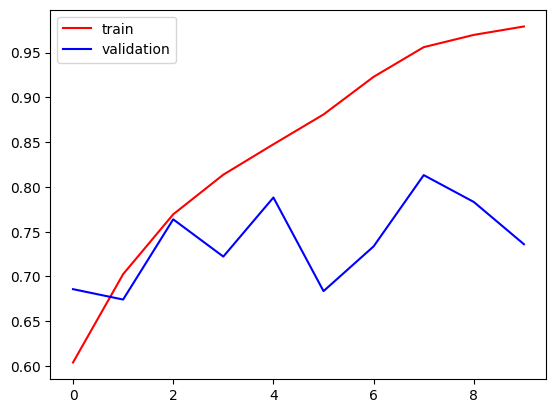

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

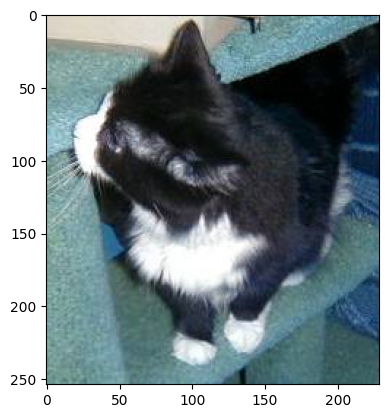

In [ ]:
import cv2

ctest_img=cv2.imread('/content/test/cats/cat.1034.jpg')
plt.imshow(ctest_img)

In [ ]:
ctest_img=cv2.resize(ctest_img,(256,256))
cinput=ctest_img.reshape((1,256,256,3))

model.predict(cinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

# Task 2: Transfer Learning

In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[70%:85%]", "train[85%:]"],
    as_supervised=True,
    with_info=True
)

NUM_CLASSES = ds_info.features["label"].num_classes
print("Number of classes:", NUM_CLASSES)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.3D8FNO_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of classes: 5


In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

ds_train = (
    ds_train
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

ds_val = (
    ds_val
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

ds_test = (
    ds_test
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

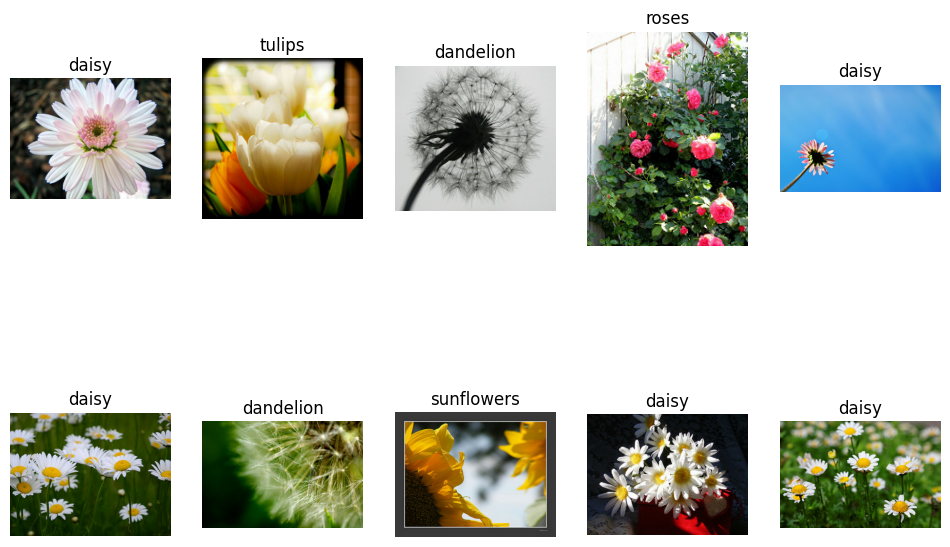

In [14]:
import matplotlib.pyplot as plt
import random

ds_train, ds_info = tfds.load(
    "tf_flowers",
    split="train",
    as_supervised=True,
    with_info=True
)

class_names = ds_info.features["label"].names

sample = list(ds_train.take(100))
random_images = random.sample(sample, 10)

plt.figure(figsize=(12, 8))

for i, (image, label) in enumerate(random_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")

plt.show()

In [7]:
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
EPOCHS = 10

history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=EPOCHS
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 38s 263ms/step - accuracy: 0.3873 - loss: 1.6682 - val_accuracy: 0.8258 - val_loss: 0.5205
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.7843 - loss: 0.5902 - val_accuracy: 0.8657 - val_loss: 0.3821
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.8407 - loss: 0.4497 - val_accuracy: 0.8766 - val_loss: 0.3345
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.8769 - loss: 0.3549 - val_accuracy: 0.9002 - val_loss: 0.2956
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.8980 - loss: 0.2852 - val_accuracy: 0.9020 - val_loss: 0.2870
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9171 - loss: 0.2548 - val_accuracy: 0.9093 - val_loss: 0.2663
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9217 - loss: 0.2424 - val_accuracy: 0.9038 - val_loss: 0.2590
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.9325 - loss: 0.1991 - val_accu

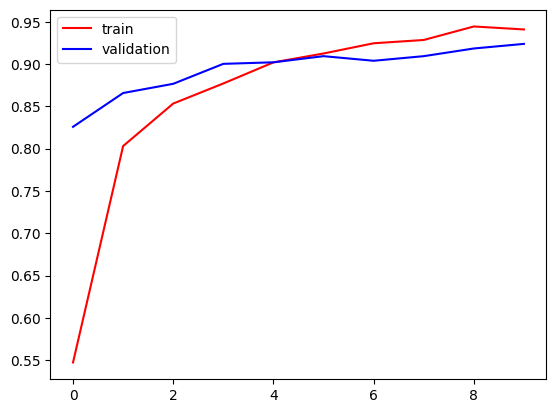

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Task 3: Spam Email / SMS Detection


In [19]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [22]:
df.drop(df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],inplace=True,axis=1)
df.isnull().sum()

,0
v1,0
v2,0


In [23]:
def clean_text(texts):
    for text in texts:
        text = text.lower()

        return text

clean_text(df['v2'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
X = df['v2']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

Accuracy: 0.9692687303723643


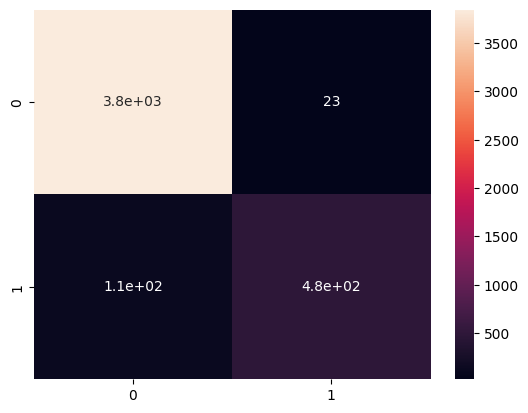

In [26]:
predictions = logreg.predict(X_test)

accuracy = logreg.score(X_test, y_test)
print('Accuracy: ' + str(accuracy))

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True)
plt.show()